<a href="https://colab.research.google.com/github/Harmeet208/LeadScoringSolution/blob/main/LeadScoringSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing and Reading Data

In [213]:
# Importing required libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [214]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")

In [215]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [216]:
leads_data.shape

(9240, 37)

In [217]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [218]:
# Columnwise Percentage of null values
(leads_data.isna().sum()/len(leads_data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Observation** - From the above data we can see that some columns like Asymmetric profile index and lead quality contains more than 40 percent of rows as null values. So, we will be dropping these in order to avoid biases when cleaning data.

In [219]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Observation** - What we can observe from above data is that 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers as evident by their min and max values, will verify these by plotting graphs for the same.

### Data Cleaning

In [220]:
# Checking data type to check if they are correct
leads_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

It seems that none of the columns require conversions.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. As, these values can be optional dropdown which the customer would have left as is i.e 'Select'.

In [221]:
# Finding column names in which 'Select' level is available:-

cols=list(leads_data.columns)
select_cols_list = list()
for i in cols:
    if 'Select' in leads_data[i].values:
        select_cols_list.append(i)
# Columns with Select values present in them
select_cols_list

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

Replacing the values in these columns i.e Specialization','How did you hear about X Education', 'Lead Profile','City' with null values in order to check the change in number of null values.

In [222]:
leads_data = leads_data.replace('Select', np.nan)

In [223]:
# Verifying the Select

cols=list(leads_data.columns)
select_cols_list = list()
for i in cols:
    if 'Select' in leads_data[i].values:
        select_cols_list.append(i)
# Columns with Select values present in them
select_cols_list

[]

Dealt with Select values in columns, now none left. Thereafter, will check for the null values present now after imputation.

In [224]:
# Columnwise Percentage of null values after imputation
null_cols = (leads_data.isna().sum()/len(leads_data))*100
null_cols

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Observation** -
Below coloumns having missing values of approximately 45% are the index and score assigned to each customer based on their activity and their profile-
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score

Better to drop the below columns having more than or near to 40 percent of missing values to avoid biases.
-Lead Profile, Lead Quality, How did you hear about X Education

Some columns such as City having approx. 39% missing values and if we will impute these with mode of city then our data will be some what biased towards these values. So better to drop it.
Lead Quality, Tags, Asymmetrique scores ,Profile and Last Notable Activity are created by the sales team so we can drop these columns.

Dropping Columns

In [225]:
# Listing all the columns having more than or near about 40% missing values into 'missing_columns'-
null_cols_40 = leads_data.columns[null_cols > 30]
null_cols_40

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [226]:
# Creating copy of original datarframe-
leads_data1 = leads_data.copy()

In [227]:
# Before that removing specialization columns from the list since it can be a driving factor for the leads getting converted
null_cols_40_wo_s = null_cols_40.drop('Specialization')
# Dropping the columns having more than or near about 40% missing values-
leads_data1 = leads_data1.drop(null_cols_40_wo_s, axis=1)

In [228]:
leads_data1.shape

(9240, 28)

In [229]:
# Checking for null values again
(leads_data1.isna().sum()/len(leads_data1))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Now only Specialization is left with near about 36 percent of missing values. And imputing these values with 'Other'.  Now, lets plot some graphs in order to check trends across various columns if any.

In [230]:
# Replacing these with other
leads_data1['Specialization'].fillna('Other',inplace=True)

### Plotting Graphs And Missing Value Treatment

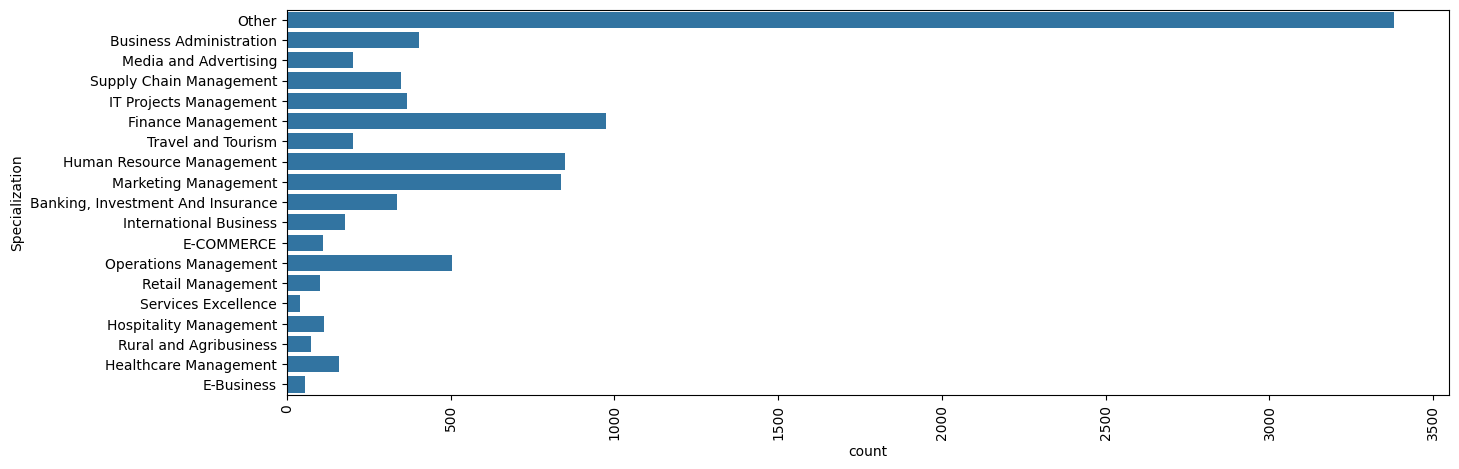

In [231]:
# Plotting a count plot in order to see trends if any
plt.figure(figsize=(15,5))
sns.countplot(leads_data1['Specialization'])
plt.xticks(rotation=90)
plt.show()

Specialization value **other** has maximum frequency

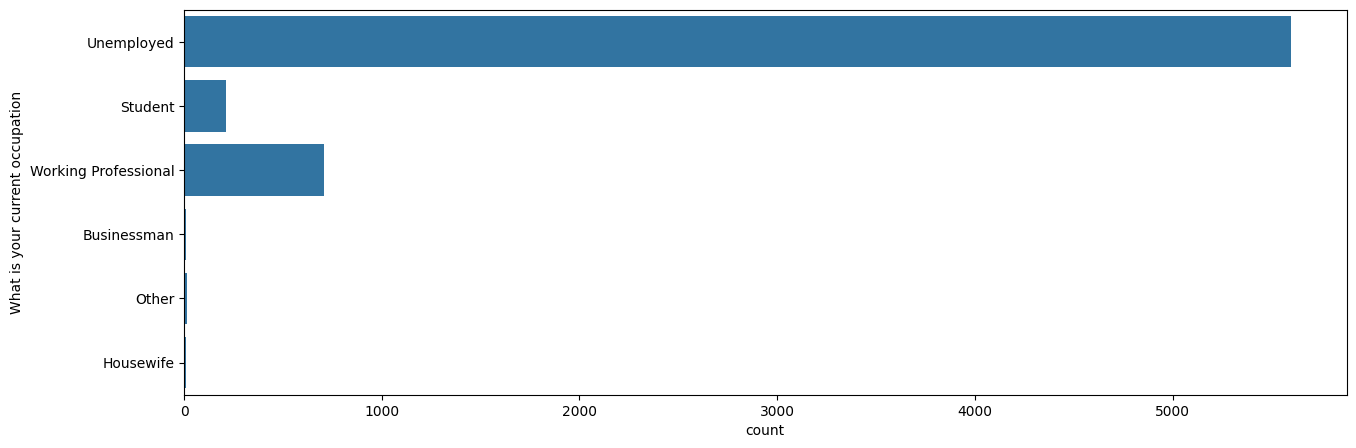

In [232]:
# Plotting count plot to check data counts in column 'What is your current occupation' which has next most number of
# missing values after specialization
plt.figure(figsize=(15,5))
sns.countplot(leads_data1['What is your current occupation'])
plt.show()

Observation - As seen above 'Unemployed' value's count is highest but we will impute missing values with 'Other' considering we do not know current occupation of lead.

In [233]:
leads_data1['What is your current occupation'].fillna('Other',inplace=True)

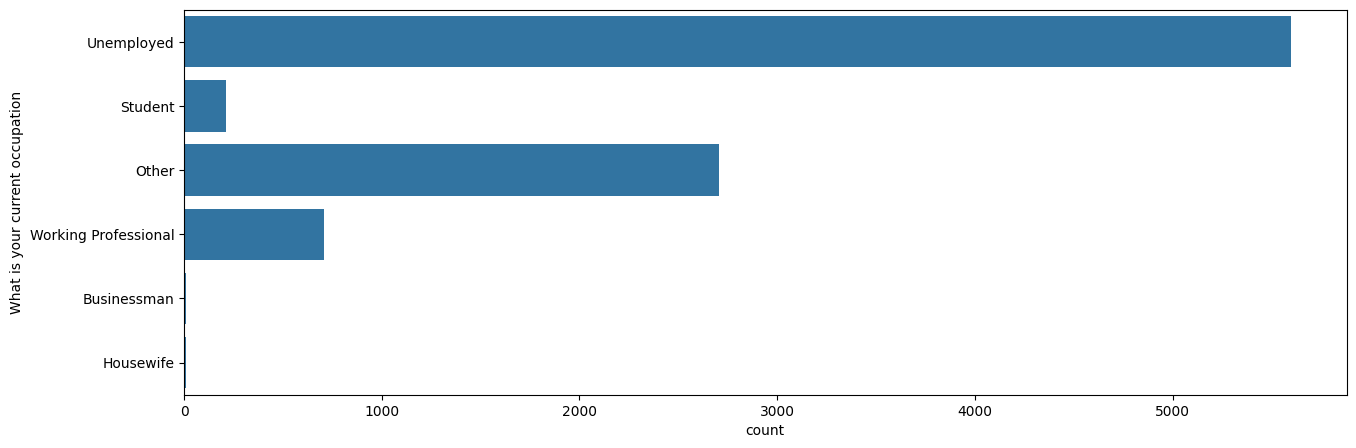

In [234]:
# Checking count of 'Other' now
plt.figure(figsize=(15,5))
sns.countplot(leads_data1['What is your current occupation'])
plt.show()

Now checking for next column having the most missing values i.e 'What matters most to you in choosing a course'

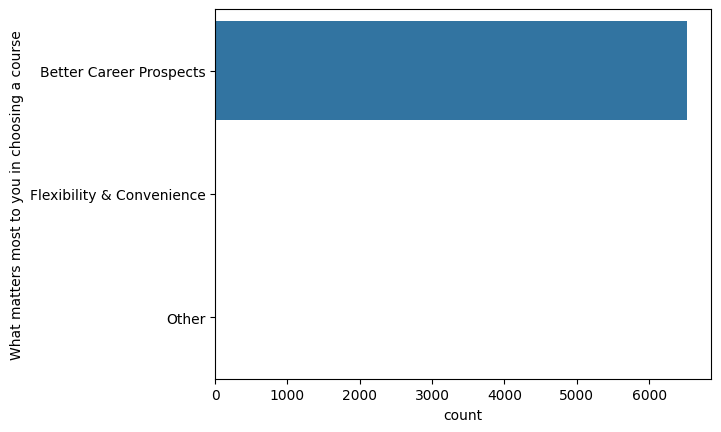

In [235]:
sns.countplot(leads_data1['What matters most to you in choosing a course'])
plt.show()

**Observation** - 'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'.

In [236]:
# Replacing the values with mode of the column that is Better Career Prospects
mode_course = leads_data1['What matters most to you in choosing a course'].mode()[0]
leads_data1['What matters most to you in choosing a course'].fillna(mode_course,inplace=True)

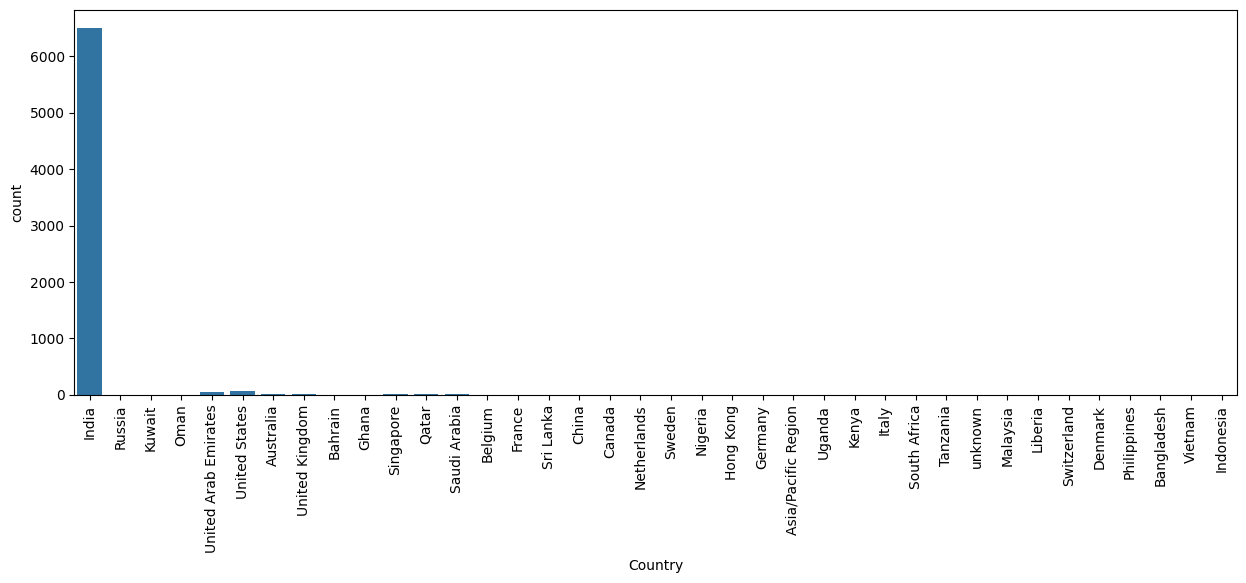

In [237]:
# Plotting count plot to visualize counts of data of 'Country' column:-
plt.figure(figsize=(15,5))
sns.countplot(x=leads_data1['Country'])
plt.xticks(rotation=90)
plt.show()

**Observation** India has highest count among countries. Hence, we can impute the missing values using India. Also,will be checking the percentage distribution of the country value columns since, the number of values as India being unusually high.

In [238]:
leads_data1.Country.fillna('India',inplace=True)

In [239]:
leads_data1['Country'].value_counts(normalize=True)*100

Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

**Observation** - After imputing missing values. Since, India constitutes about 96 percent of values for Country column, what we can also do is replace other countries with a new value as 'Other' if we want to check for India vs Others. Or we can drop the column as it can make the data biased toward the India and we won't be able to draw genuine insights from data.

In [240]:
# Dropping for Country column for now
leads_data1.drop('Country',axis=1,inplace=True)

In [241]:
# Checking Null Values now
(leads_data1.isna().sum()/len(leads_data1))*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

**Observation** - Now most of the columns left with missing value have missing value of around 0 to 2%. Hence, plotting graphs wont be efficient approach. Proceeding from here we will be imputing these values with median for numerical columns and mode for categorical ones.

In [242]:
# Imputing missing value with 'median' value for 'TotalVisits'
leads_data1['TotalVisits'].fillna(leads_data1['TotalVisits'].median(), inplace=True)

In [243]:
# Imputing missing value with 'median' value for 'Page Views Per Visit'
leads_data1['Page Views Per Visit'].fillna(leads_data1['Page Views Per Visit'].median(), inplace=True)

In [244]:
# Checking for most frequent value in Last Activity column
leads_data1['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [245]:
# Imputing missing values with 'Email Opened' being the median -
leads_data1['Last Activity'] = leads_data1['Last Activity'].replace(np.nan, 'Email Opened')

In [246]:
# Now for lead source
# Checking value counts of 'Lead Source'
leads_data1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

**Observation** - 'Google' and 'google' are present as two different values ,so better to replace 'google' with 'Google'.
'Google' is having highest number occurance so we can also impute missing values with 'Google'.

In [247]:
# Replacing google with Google
leads_data1['Lead Source']=leads_data1['Lead Source'].replace('google','Google')

In [248]:
# Checking for number of missing values in the lead source columns
leads_data1['Lead Source'].isna().sum()

36

In [249]:
# Replacing missing values with Google
leads_data1['Lead Source'] = leads_data1['Lead Source'].replace(np.nan, 'Google')

In [250]:
# Again Checking for number of missing values in the lead source columns
leads_data1['Lead Source'].isna().sum()

0

In [251]:
round(100*(leads_data1.isnull().sum()/len(leads_data1)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [252]:
# Checking the shape
leads_data1.shape

(9240, 27)

Now, no columns are there with missing values.

Checking for duplicate rows in the data for customer if any s. Since, they are identified using **Prospect ID** and **Lead Number** so checking these two only.

In [253]:
# For Prospect ID
leads_data1.duplicated(subset = 'Prospect ID').sum()

0

In [254]:
# For Lead Number
leads_data1.duplicated(subset = 'Lead Number').sum()

0

**Observation** - Both columns do not have any duplicates hence each row contains data of different customers. Also, we can drop these columns as they are as good as index for rows.

In [255]:
leads_data1.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

### Checking data distribution of the categorical variables

In [256]:
cols=list(leads_data1.iloc[:,:])  # Creating list 'cols' of variables
for i in cols:
    print('-->',i,'<--')
    print(leads_data1[i].value_counts(), '\n')

--> Lead Origin <--
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

--> Lead Source <--
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

--> Do Not Email <--
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

--> Do Not Call <--
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

--> Converted <--
Converted
0 

**Observation** - As seen in above data that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute irrelevant to analysis ,so better to drop these columns.

In [257]:
# Dropping these columns
leads_data1.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'Last Notable Activity'],axis=1,inplace=True)

In [258]:
leads_data1.shape

(9240, 11)

Now we are left with 11 columns with no null values. Proceeding with exploratory data analysis.

### EDA

##### Univariate analysis

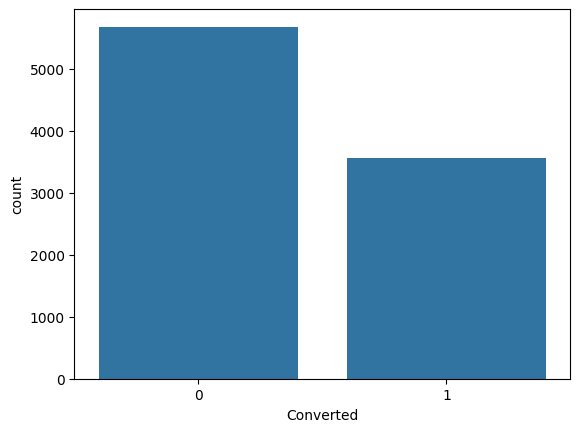

In [259]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(data=leads_data1, x='Converted')
plt.show()

From count plot we can see that no of non-converted leads are less than those who got converted.

For Categorical variables

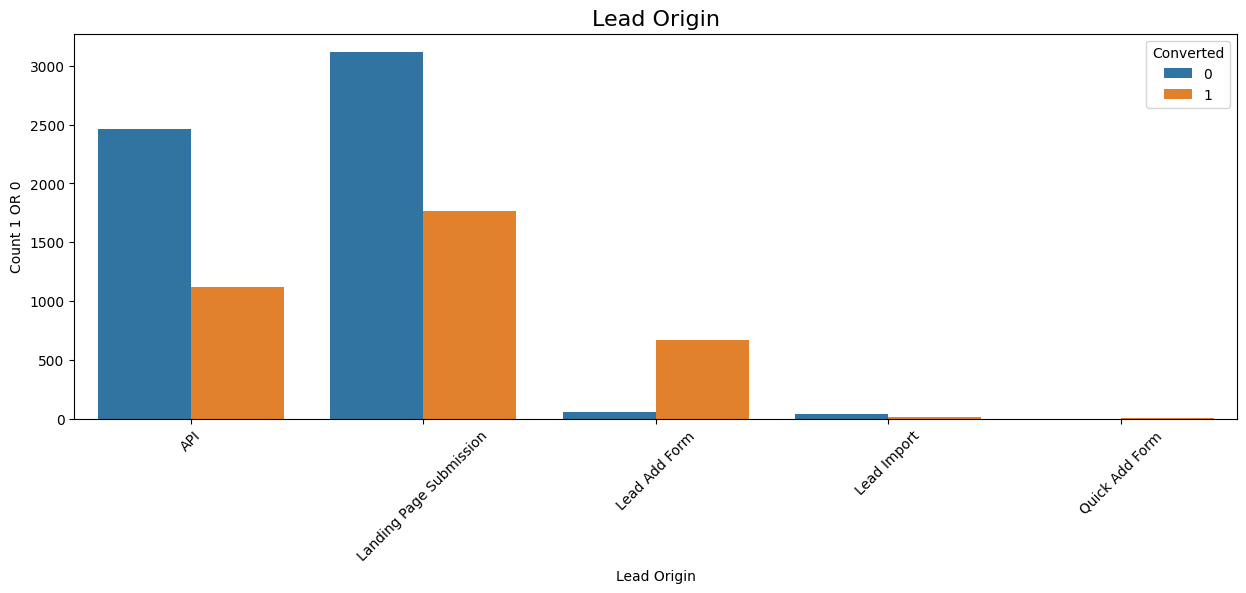

In [260]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1

plt.figure(figsize = (15,5))
ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data1)
plt.ylabel("Count 1 OR 0")
plt.xticks(rotation = 45)
plt.title('Lead Origin',fontsize=16)
plt.show()

**Observation and recommendation -**
As seen above API, Lead Import and Landing page submission have high non converted leads so to improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission and check what changes can be done in lead add form in order for it to be more efficient.

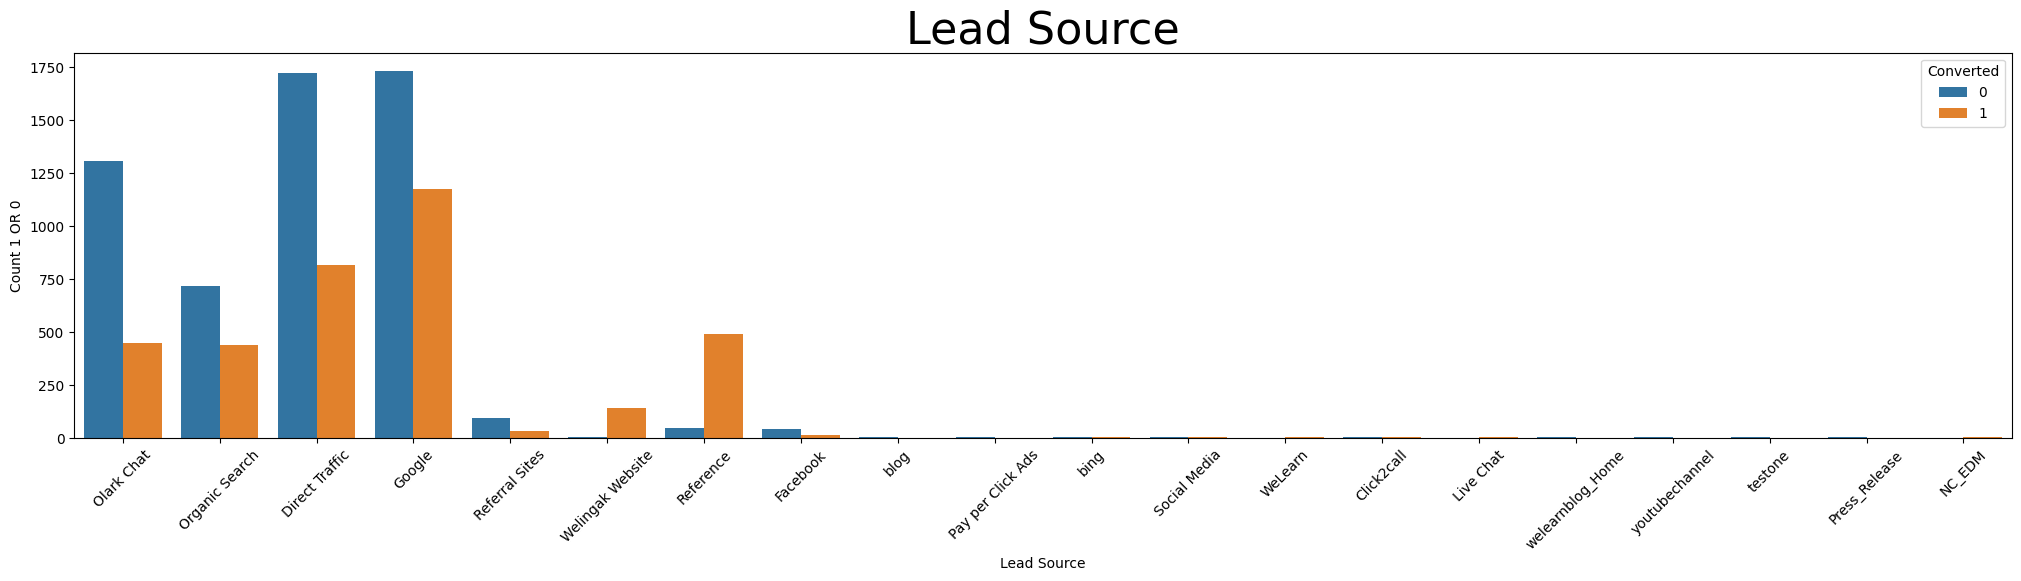

In [261]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 -
plt.figure(figsize = (25, 5))
ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data1)
plt.ylabel("Count 1 OR 0")
plt.xticks(rotation = 45)
plt.title('Lead Source',fontsize=32)
plt.show()

Since most of the values have low frequency hence we can also club those lead sources to form one source known as Other.

In [262]:
leads_data1['Lead Source'] = leads_data1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

Plotting again

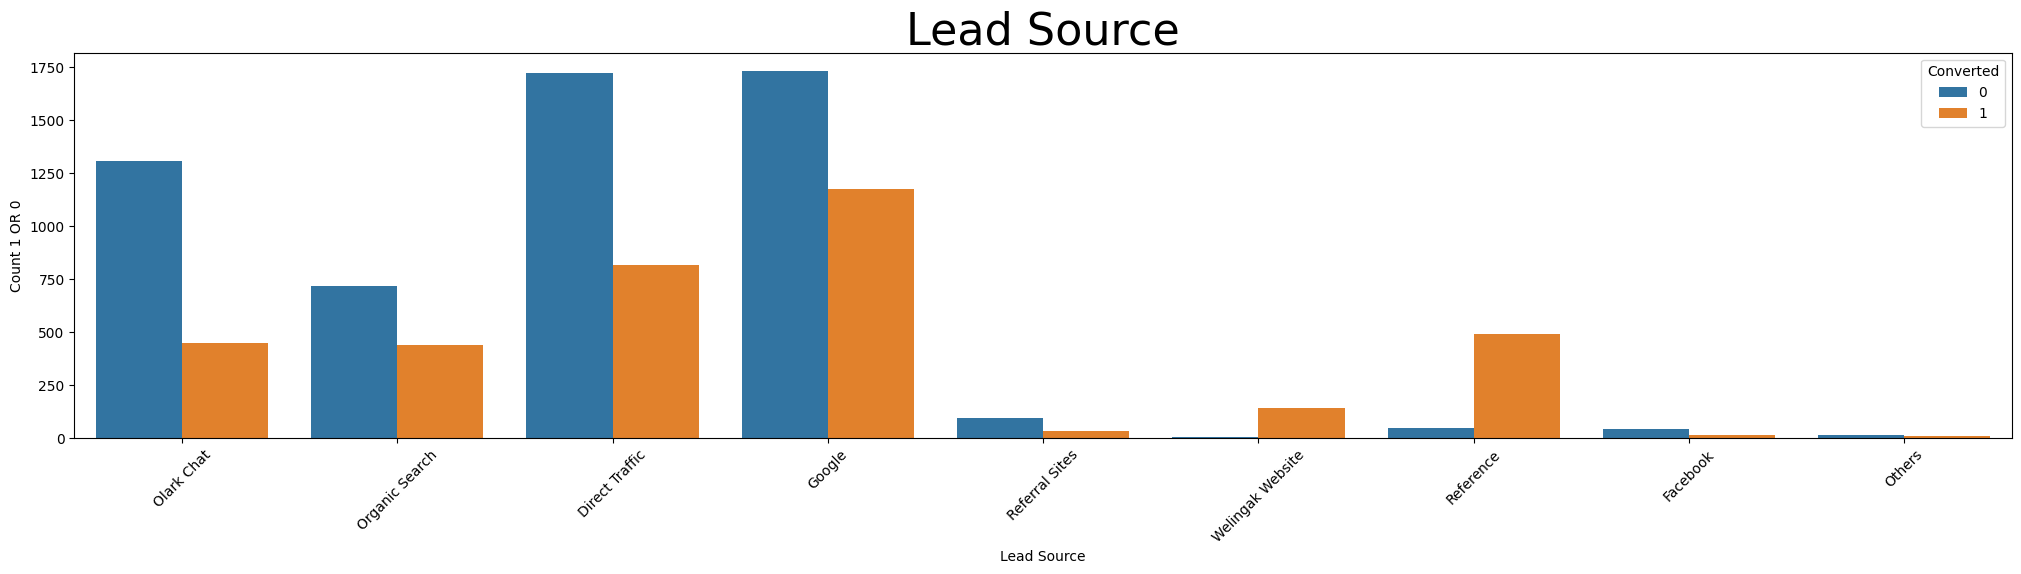

In [263]:
plt.figure(figsize = (25, 5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data1)
plt.ylabel("Count 1 OR 0")
plt.xticks(rotation = 45)
plt.title('Lead Source',fontsize=32)
plt.show()

**Observation and Recommendation** -
Google and Direct traffic generates maximum number of leads but the conversion rate is low. And hence we need to check the quality of the leads generated through these platforms.
Conversion rate of 'Reference' and 'Welingak Website' leads is high. Hence, we can check for any patterns in these two kind of leads.


For Numerical Variables

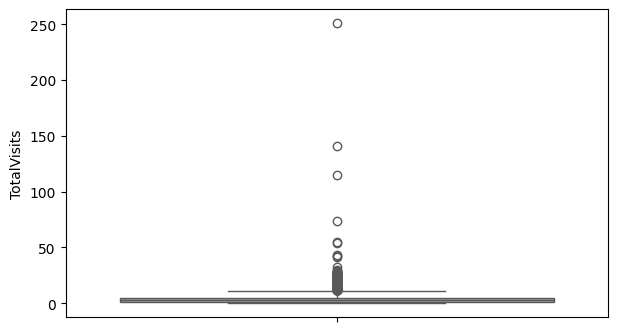

In [264]:
# Boxplot for TotalVisits
plt.figure(figsize = (7,4))
sns.boxplot(leads_data1['TotalVisits'],orient='v',palette='Set2')
plt.show()

**Observations** - Outliers are present on the upper side and so we can treat those by removing the ones which are present beyond fourth quartile.

In [265]:
Q3 = leads_data1.TotalVisits.quantile(0.99)
leads_data1 = leads_data1[(leads_data1.TotalVisits <= Q3)]

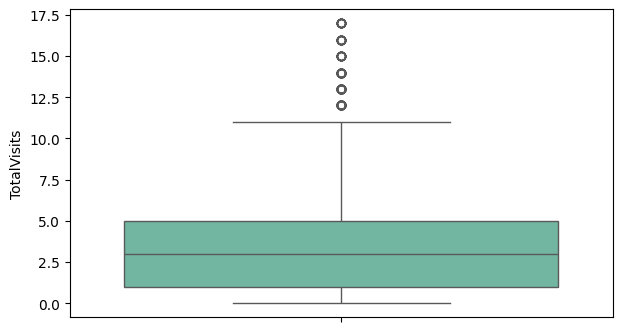

In [266]:
# Verifying again
plt.figure(figsize = (7,4))
sns.boxplot(y=leads_data1['TotalVisits'],palette='Set2')
plt.show()

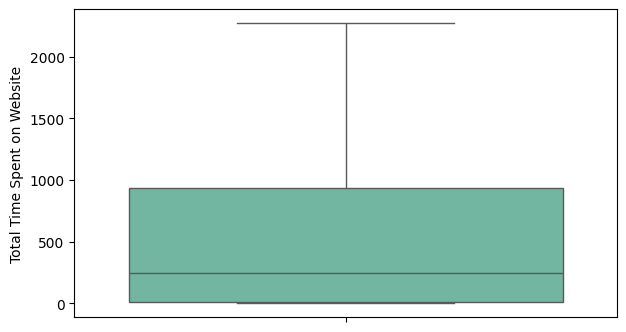

In [267]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website'-
plt.figure(figsize=(7,4))
sns.boxplot(y=leads_data1['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

Observation - From above box plot we can see that there is no outlier in Total Time Spent on Website.

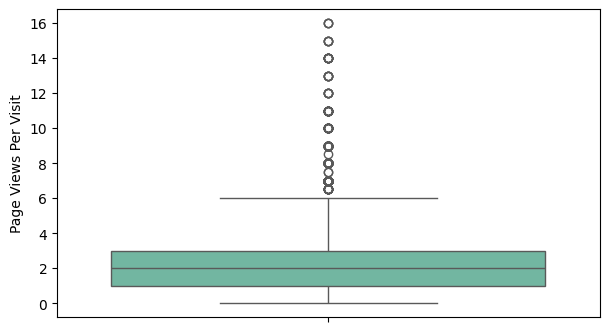

In [268]:
# Boxplot of 'Page Views Per Visit'-
plt.figure(figsize=(7,4))
sns.boxplot(y=leads_data1['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

In [269]:
# Treating upper range outliers-
Q3 = leads_data1['Page Views Per Visit'].quantile(0.99)
leads_data1 = leads_data1[(leads_data1['Page Views Per Visit'] <= Q3)]

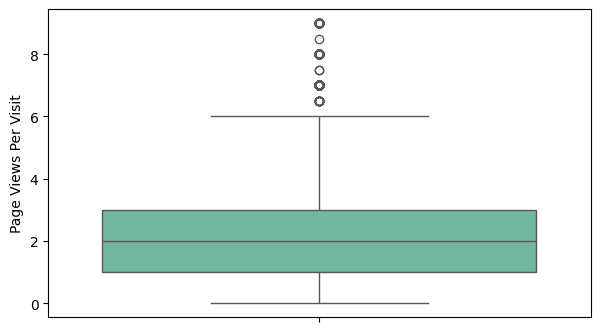

In [270]:
plt.figure(figsize=(7,4))
sns.boxplot(y=leads_data1['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

#### Bivariate Analysis

In [271]:
numeric_data = leads_data1.select_dtypes(include=['number'])
numeric_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
...,...,...,...,...
9235,1,8.0,1845,2.67
9236,0,2.0,238,2.00
9237,0,2.0,199,2.00
9238,1,3.0,499,3.00


<Axes: >

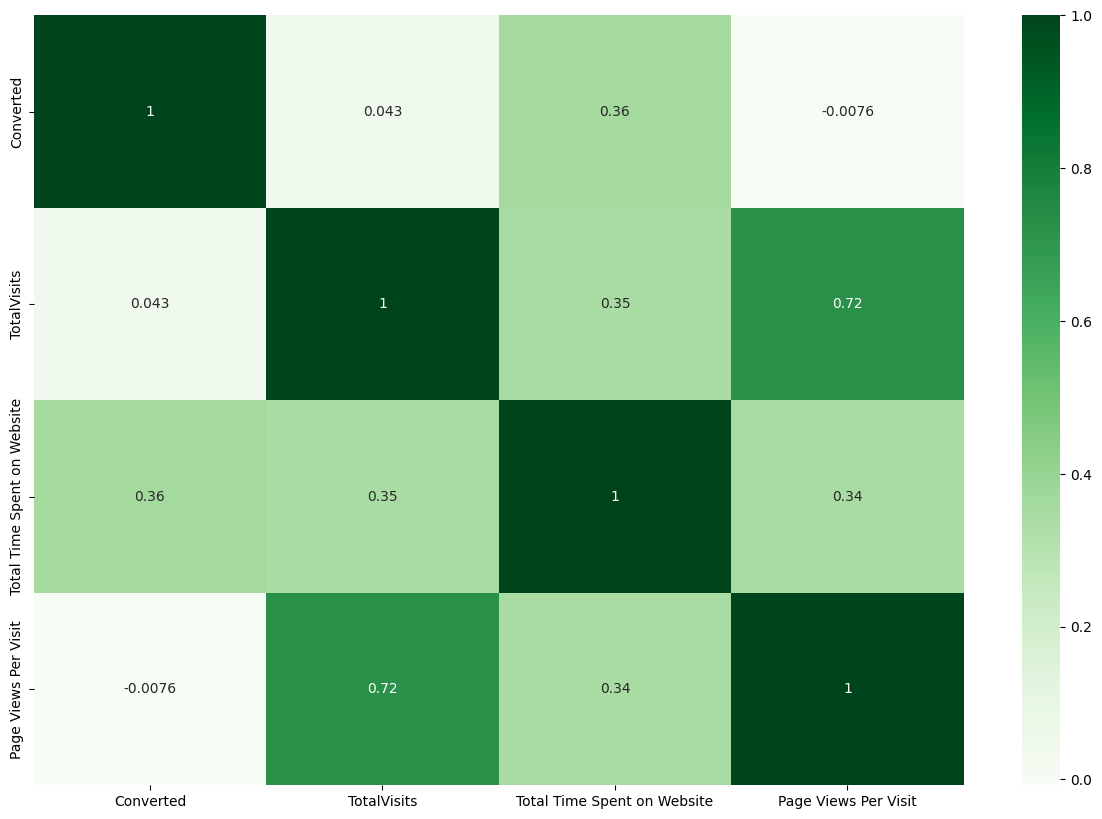

In [272]:
plt.figure(figsize = (15,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')

**Observation**
'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72.
There is a high negative correlation between 'Page Views per Visit' and 'Converted'.

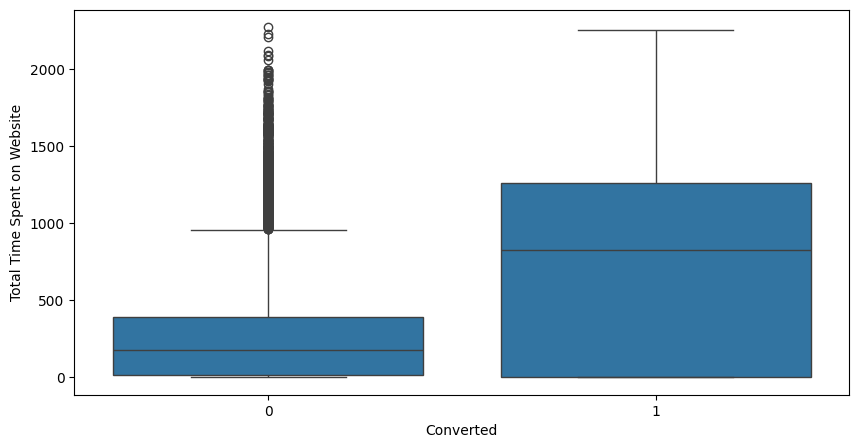

In [273]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution-
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=leads_data1)
plt.show()

**Observation** - Leads spending more time on website have high chances to opt for courses and getting converted.

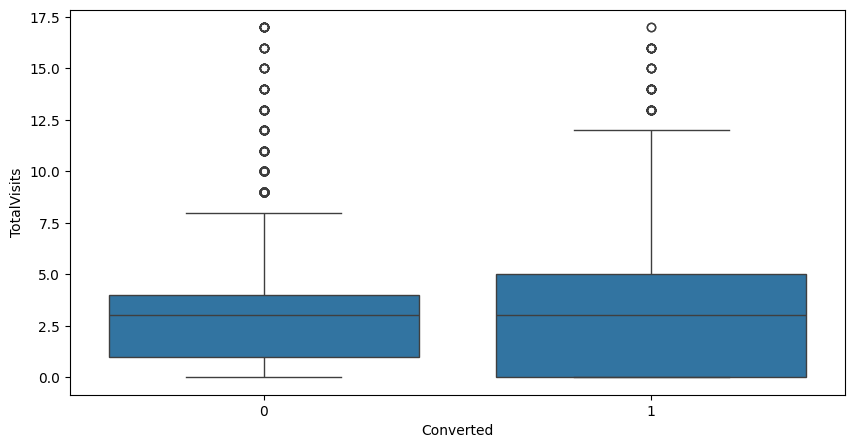

In [274]:
# Plotting box of "Total Visits" vs "Converted" variable -
plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data1)
plt.show()

**Observation** - From above plot we can see that median for converted and non-converted is approx same.

### Data Preparation

In [275]:
var =  ['Do Not Email','A free copy of Mastering The Interview']
leads_data1[var].value_counts()

Do Not Email  A free copy of Mastering The Interview
No            No                                        5864
              Yes                                       2519
Yes           No                                         428
              Yes                                        279
Name: count, dtype: int64

In [276]:
# Mapping Yes No to 1 and 0 in the above two columns

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [277]:
# Applying the function to the variable:-
leads_data1[var] = leads_data1[var].apply(binary_map)

In [278]:
leads_data1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0


Creating Dummy Variables for Catergorical Variables With multiple categories

In [279]:
# Finding categorical variables and storing them in cat_col variables
cat_col= leads_data1.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [280]:
dummy = pd.get_dummies(leads_data1[cat_col], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [284]:
# Converting bool cols to integer
dummy = dummy.astype(int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [285]:
leads_data1= pd.concat([dummy,leads_data1],axis = 1)

In [286]:
leads_data1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,...,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0
1,0,0,0,0,0,0,0,1,0,0,...,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0
2,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,1,0,0,0,0,0,0,0,0,0,...,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,1,0,0,0,0,1,0,0,0,0,...,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0


In [287]:
# Dropping the columns whose dummy variables have been created
leads_data1.drop(cat_col,axis=1,inplace = True)

In [288]:
leads_data1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2.0,1428,1.0,0


In [289]:
# Checking data types
leads_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   int64  
 1   Lead Origin_Lead Add Form                             9090 non-null   int64  
 2   Lead Origin_Lead Import                               9090 non-null   int64  
 3   Lead Origin_Quick Add Form                            9090 non-null   int64  
 4   Lead Source_Facebook                                  9090 non-null   int64  
 5   Lead Source_Google                                    9090 non-null   int64  
 6   Lead Source_Olark Chat                                9090 non-null   int64  
 7   Lead Source_Organic Search                            9090 non-null   int64  
 8   Lead Source_Others                                    9090 non-

### Preparing data for analysis

#### Test-Train Split

In [290]:
# Importing required libraries
from sklearn.model_selection import train_test_split

In [291]:
# Storing feature variables in X
X = leads_data1.drop(['Converted'], axis=1)
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,2.0,1428,1.0,0


In [292]:
# Storing target variable in y
y = leads_data1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [293]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [294]:
X_train.shape

(6363, 56)

In [295]:
X_test.shape

(2727, 56)

#### Feature Scaling

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
302,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1.336782,-0.428736,0.044021,0
6087,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,-1.094877,-0.887355,-1.206716,0
1033,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0.642022,-0.025151,1.477269,0
7656,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.989402,-0.241619,2.014065,1
3241,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.294642,0.897591,-0.492776,1


#### Model Building

Here we will be using RFE to select the features *required*

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [301]:
regressor = LogisticRegression()
rfe = RFE(estimator=regressor, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [302]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Marked Spam', False, 14),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Email Received', False, 30),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last

In [303]:
# Variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [304]:
# Selecting and storing those selected by rfe in new data set
X_train_rfe = X_train[col]

Manual Feature elimination based on VIF

In [305]:
# Library to check various statistics
import statsmodels.api as sm

In [306]:
# Adding and fitting model
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [307]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.1
Date:                Mon, 15 Apr 2024   Deviance:                       5150.1
Time:                        12:05:09   Pearson chi2:                 6.78e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9222      0.086    -10.673      0.000      -1.092      -0.753
Lead Origin_Landing Page Submission                     -0.2485      0.090     -2.756      0.006      -0.425      -0.072
Lead Origin_Lead Add Form                                3.1522      0.208     15.169      0.000       2.745       3.559
Lead Source_Olark Chat                                   1.0980      0.123      8.961      0.000       0.858       1.338
Lead Source_Welingak Website                             2.8235      1.027      2.749      0.006       0.811       4.836
Last Activity_Converted to Lead                         -1.1547      0.211     -5.483      0.000      -1.567      -0.742
Last Activity_Had a Phone Conversation                   1.5035      0.652      2.306      0.021       0.225       2.782
Last Activity_Olark Chat Conversation                   -1.3094      0.164     -7.963      0.000      -1.632      -0.987
Last Activity_SMS Sent                                   1.3023      0.076     17.138      0.000       1.153       1.451
Last Activity_Unsubscribed                               1.4281      0.446      3.202      0.001       0.554       2.302
Specialization_Hospitality Management                   -0.8285      0.336     -2.468      0.014      -1.486      -0.171
What is your current occupation_Housewife               22.8455   1.43e+04      0.002      0.999   -2.79e+04     2.8e+04
What is your current occupation_Other                   -1.2534      0.088    -14.210      0.000      -1.426      -1.081
What is your current occupation_Working Professional     2.5456      0.187     13.629      0.000       2.180       2.912
Do Not Email                                            -1.6312      0.179     -9.094      0.000      -1.983      -1.280
Total Time Spent on Website                              1.0914      0.040     27.036      0.000       1.012       1.171
========================================================================================================================
"""

Checking for multi collinearity

In [308]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [309]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.69
0,Lead Origin_Landing Page Submission,1.66
1,Lead Origin_Lead Add Form,1.50
11,What is your current occupation_Other,1.48
7,Last Activity_SMS Sent,1.45
6,Last Activity_Olark Chat Conversation,1.42
3,Lead Source_Welingak Website,1.29
14,Total Time Spent on Website,1.25
12,What is your current occupation_Working Profes...,1.20
13,Do Not Email,1.20


Dropping the variable 'What is your current occupation_Housewife' with p value 0.999

In [310]:
X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

Creating a new Model

In [311]:
X_train_sm2 = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.7
Date:                Mon, 15 Apr 2024   Deviance:                       5163.4
Time:                        12:10:58   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9154      0.086    -10.609      0.000      -1.085      -0.746
Lead Origin_Landing Page Submission                     -0.2432      0.090     -2.701      0.007      -0.420      -0.067
Lead Origin_Lead Add Form                                3.1706      0.207     15.281      0.000       2.764       3.577
Lead Source_Olark Chat                                   1.0959      0.122      8.950      0.000       0.856       1.336
Lead Source_Welingak Website                             2.8020      1.027      2.729      0.006       0.789       4.815
Last Activity_Converted to Lead                         -1.1632      0.210     -5.526      0.000      -1.576      -0.751
Last Activity_Had a Phone Conversation                   1.4938      0.652      2.291      0.022       0.216       2.772
Last Activity_Olark Chat Conversation                   -1.3140      0.164     -7.993      0.000      -1.636      -0.992
Last Activity_SMS Sent                                   1.2935      0.076     17.041      0.000       1.145       1.442
Last Activity_Unsubscribed                               1.4232      0.446      3.190      0.001       0.549       2.298
Specialization_Hospitality Management                   -0.8351      0.336     -2.488      0.013      -1.493      -0.177
What is your current occupation_Other                   -1.2582      0.088    -14.272      0.000      -1.431      -1.085
What is your current occupation_Working Professional     2.5383      0.187     13.590      0.000       2.172       2.904
Do Not Email                                            -1.6363      0.179     -9.122      0.000      -1.988      -1.285
Total Time Spent on Website                              1.0910      0.040     27.054      0.000       1.012       1.170
========================================================================================================================
"""

Cheking for VIF since p values seems quite low for columns now

In [312]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.69
0,Lead Origin_Landing Page Submission,1.66
1,Lead Origin_Lead Add Form,1.50
10,What is your current occupation_Other,1.48
7,Last Activity_SMS Sent,1.45
6,Last Activity_Olark Chat Conversation,1.42
3,Lead Source_Welingak Website,1.29
13,Total Time Spent on Website,1.25
11,What is your current occupation_Working Profes...,1.20
12,Do Not Email,1.20


Based on VIF and p values we might need not to drop any columns further.

#### Making the prediction

In [314]:
y_train_pred = logm2.predict(X_train_sm2)
y_train_pred[:10]

302     0.066526
6087    0.024555
1033    0.280330
7656    0.146172
3241    0.752902
5738    0.034933
7366    0.108948
3680    0.042590
4170    0.736158
43      0.050187
dtype: float64

In [315]:
# Changing axis
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06652648, 0.02455516, 0.28032974, 0.14617249, 0.75290229,
       0.03493343, 0.10894815, 0.04258983, 0.7361578 , 0.05018732])

In [ ]:
# Creating a dataframe with the actual Converted value and the predicted values

In [316]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.066526,302
1,0,0.024555,6087
2,0,0.280330,1033
3,0,0.146172,7656
4,1,0.752902,3241


#### Finding optimal cutoff point

In [317]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066526,302,1,0,0,0,0,0,0,0,0,0
1,0,0.024555,6087,1,0,0,0,0,0,0,0,0,0
2,0,0.280330,1033,1,1,1,0,0,0,0,0,0,0
3,0,0.146172,7656,1,1,0,0,0,0,0,0,0,0
4,1,0.752902,3241,1,1,1,1,1,1,1,1,0,0


In [318]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [319]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.602389  0.982290  0.367980
0.2   0.2  0.765205  0.918451  0.670648
0.3   0.3  0.790508  0.880148  0.735197
0.4   0.4  0.813767  0.770593  0.840407
0.5   0.5  0.817067  0.700988  0.888691
0.6   0.6  0.807481  0.637150  0.912579
0.7   0.7  0.785636  0.523476  0.947395
0.8   0.8  0.751689  0.394152  0.972300
0.9   0.9  0.716486  0.278830  0.986531


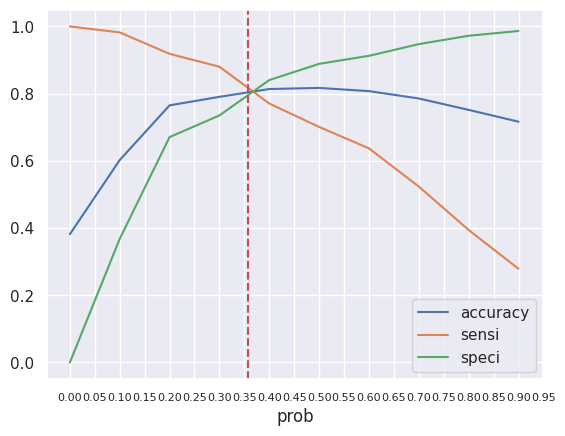

In [320]:
sns.set(style = 'darkgrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline
plt.show()

In [321]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [322]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)

In [323]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.066526,302,0
1,0,0.024555,6087,0
2,0,0.280330,1033,0
3,0,0.146172,7656,0
4,1,0.752902,3241,1


### Assigning Leads

In [324]:
# Assigning lead score to the leads based to prediction
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [325]:
# Selecting only important columns and displaying head of dataframe:-
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.066526,302,0,7
1,0,0.024555,6087,0,2
2,0,0.280330,1033,0,28
3,0,0.146172,7656,0,15
4,1,0.752902,3241,1,75


### Model Evaluation

In [332]:
from sklearn import metrics

In [327]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3199,  736],
       [ 487, 1941]])

In [333]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8077950652208078

In [334]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [335]:
# Sensitivity
TP / float(TP+FN)

0.7994233937397035

In [336]:
# Specificity
TN / float(TN+FP)

0.8129606099110547

In [337]:
# False Postive Rate - predicting conversion when customer does not have convert:-
FP/ float(TN+FP)

0.18703939008894535

In [338]:
# Positive Predictive value
TP / float(TP+FP)

0.7250653716847217

In [339]:
# Negative Predictive Value
(TN / float(TN+ FN))

0.8678784590341834

Precision And Recall

In [342]:
# Precision
TP / (TP + FP)

0.7250653716847217

In [343]:
# Recall
TP / (TP + FN)

0.7994233937397035

**Observations** -
Sensitivity : 80%
Specificity : 81%
Precision: 72%
Recall: 80% approx.

### Plotting the ROC Curve

In [344]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [345]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

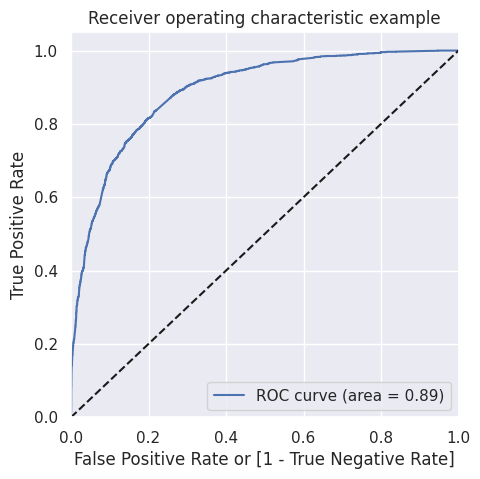

In [346]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC curve value of 0.89 suggests that model is good in terms of predictive power.

### Making predictions on the test set

In [347]:
# Scaling variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [348]:
test_col = X_train_sm2.columns

X_test=X_test[test_col[1:]]

X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 6906 to 6219
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Landing Page Submission                   2727 non-null   int64  
 2   Lead Origin_Lead Add Form                             2727 non-null   int64  
 3   Lead Source_Olark Chat                                2727 non-null   int64  
 4   Lead Source_Welingak Website                          2727 non-null   int64  
 5   Last Activity_Converted to Lead                       2727 non-null   int64  
 6   Last Activity_Had a Phone Conversation                2727 non-null   int64  
 7   Last Activity_Olark Chat Conversation                 2727 non-null   int64  
 8   Last Activity_SMS Sent                                2727 n

In [350]:
# Making Predictions on the X_test dataset
y_test_pred = logm2.predict(X_test)
y_test_pred[:10]

6906    0.902814
1873    0.386775
771     0.143640
4495    0.137239
9061    0.548242
4929    0.527193
2308    0.065724
1034    0.135237
9033    0.115419
7008    0.914900
dtype: float64

In [351]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.902814
1873,0.386775
771,0.143640
4495,0.137239
9061,0.548242


In [352]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [353]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [354]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.902814
1,0,1873,0.386775
2,0,771,0.143640
3,0,4495,0.137239
4,1,9061,0.548242


In [355]:
# Adjusting data to present
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.902814
1,1873,0,0.386775
2,771,0,0.143640
3,4495,0,0.137239
4,9061,1,0.548242


In [358]:
# Getting the values between 1 and 100 and storing them in separate column as Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,6906,1,0.902814,90
1,1873,0,0.386775,39
2,771,0,0.143640,14
3,4495,0,0.137239,14
4,9061,1,0.548242,55


In [360]:
# Keeping 0.35 as cutoff and predicting the conversion value
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,6906,1,0.902814,90,1
1,1873,0,0.386775,39,1
2,771,0,0.143640,14,0
3,4495,0,0.137239,14,0
4,9061,1,0.548242,55,1


### Test Model Evaluation

In [361]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1338,  322],
       [ 218,  849]])

In [362]:
TP_test = confusion2[1,1] # true positive
TN_test = confusion2[0,0] # true negatives
FP_test = confusion2[0,1] # false positives
FN_test = confusion2[1,0] # false negatives

In [363]:
# sensitivity
TP_test / float(TP_test+FN_test)

0.795688847235239

In [364]:
# Specificity
TN_test / float(TN_test+FP_test)

0.8060240963855422

In [366]:
# False Postive Rate - predicting conversion when customer does not have convert:-
FP_test / float(TN_test+FP_test)

0.19397590361445782

Precision and Recall

In [369]:
from sklearn.metrics import precision_score, recall_score

In [368]:
# Precision
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7250213492741246

In [370]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.795688847235239

**Observation** -
For Test Set,
Sensitivity : 80%, Specificity : 80%, Precision: 72%, Recall: 79% approx.

In [374]:
# Identifying top features from model
pd.options.display.float_format = '{:.2f}'.format
logm2.params[1:].sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.17
Lead Source_Welingak Website                            2.80
What is your current occupation_Working Professional    2.54
Last Activity_Had a Phone Conversation                  1.49
Last Activity_Unsubscribed                              1.42
Last Activity_SMS Sent                                  1.29
Lead Source_Olark Chat                                  1.10
Total Time Spent on Website                             1.09
Lead Origin_Landing Page Submission                    -0.24
Specialization_Hospitality Management                  -0.84
Last Activity_Converted to Lead                        -1.16
What is your current occupation_Other                  -1.26
Last Activity_Olark Chat Conversation                  -1.31
Do Not Email                                           -1.64
dtype: float64

**Final model line equation -**
`Converted = 0.261843 + 3.17 * Lead Origin_Lead Add Form + 2.80 * Lead Source_Welingak Website + 2.54 * What is your current occupation_Working Professional + 1.42 * Last Activity_Unsubscribed + 1.49 * Last Activity_Had a Phone Conversation + 1.29 * Last Activity_SMS Sent + 1.10 * Lead Source_Olark Chat + 1.09 * Total Time Spent on Website - 0.24 * Lead Origin_Landing Page Submission - 0.84 * Specialization_Hospitality Management - 1.26 * What is your current occupation_Other - 1.31 * Last Activity_Olark Chat Conversation - 1.64 * Do Not Email`

**Final Observation** -


*   **For Test Set** - Sensitivity : 80%, Specificity : 80%, Precision: 72%, Recall: 79% approx.
*   **For Training Set** - Sensitivity : 80% Specificity : 81% Precision: 72% Recall: 80% approx.



### **Recommendations**
**To improve the potential lead conversion rate X-Education will have to** -

1. Lead Origin_Lead Add Form- Leads through 'Lead Add Form' having higher conversion rate so maintaining focus on it to get more number of leads cause they have a higher chances of getting converted.

2. Lead Source_Welingak Website - Conversion rate is higher for the leads from 'Welingak Website',so company can focus on this website to get more number of potential leads.

3. What is your current occupation_Working Professional - The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.

4. Last Activity_Had a Phone Conversation, Last Activity_SMS Sent, Lead Source_Olark Chat - These 3 features suggest that there is good chances of leads getting converted when they had been somehow in touch with company be it messages or chat or through a phone call. Hence, the work can be done upon these factors as well.

5. Total Time Spent on Website - Leads spending more time on website can be our potential converted leads. Hence, a more interactive user experience can be integrated in the website to attract a good amount of leads.

6. Lead Origin_Landing Page Submission - is affecting the leads not getting converted hence the improvements are needed on this part from the company as the same was evident in one of the above graphs.

7. Specialization_Hospitality Management - Leads have low conversion rate hence the company can check how it can cater to those kind of professionals.